--- Evaluation Analysis ---
Total Valid Evaluations: 245
Flaw Mentioned (True):    228 (93.06%)
Flaw Not Mentioned (False): 17 (6.94%)
---------------------------

Plot saved successfully to: analysis_plot.png


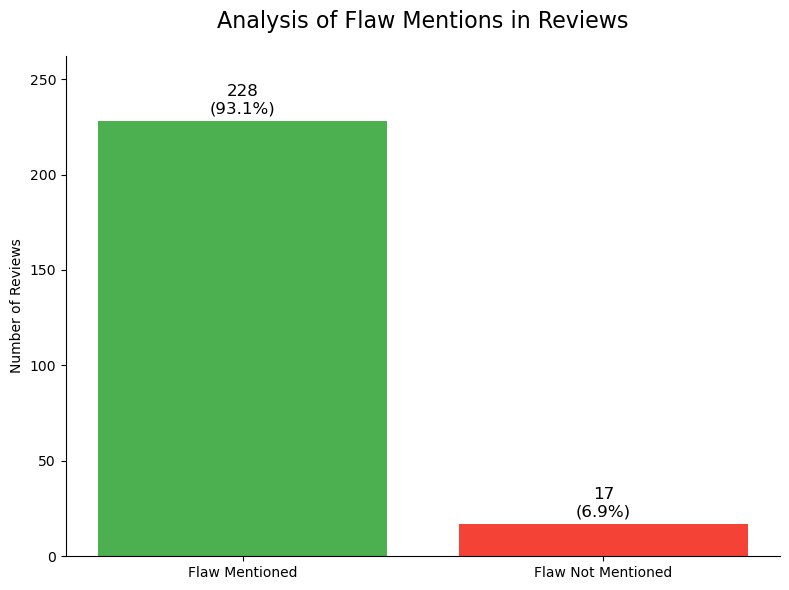

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import argparse
from pathlib import Path

def analyze_and_plot_results(json_file_path: str, output_image_path: str):
    """
    Analyzes the evaluation results from a JSON file and plots the ratio of
    flaws mentioned.

    Args:
        json_file_path (str): The path to the input JSON file.
        output_image_path (str): The path to save the output plot image.
    """
    try:
        with open(json_file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"Error: The file '{json_file_path}' was not found.")
        return
    except json.JSONDecodeError:
        print(f"Error: The file '{json_file_path}' is not a valid JSON file.")
        return

    # Extract the 'is_flaw_mentioned' boolean from the nested structure
    evaluations = []
    for item in data:
        evaluation = item.get("evaluation", {})
        # Only consider entries that are not errors
        if "is_flaw_mentioned" in evaluation:
            evaluations.append(evaluation["is_flaw_mentioned"])

    if not evaluations:
        print("No valid evaluations found in the JSON file. Cannot generate plot.")
        return

    # Convert to a pandas Series for easy value counting
    s = pd.Series(evaluations)
    counts = s.value_counts()

    # Get counts for True and False, defaulting to 0 if one is not present
    true_count = counts.get(True, 0)
    false_count = counts.get(False, 0)
    total_count = true_count + false_count
    
    if total_count == 0:
        print("No True or False values found. Cannot calculate ratio.")
        return

    # --- Print Statistics ---
    true_ratio = true_count / total_count
    print("--- Evaluation Analysis ---")
    print(f"Total Valid Evaluations: {total_count}")
    print(f"Flaw Mentioned (True):    {true_count} ({true_ratio:.2%})")
    print(f"Flaw Not Mentioned (False): {false_count} ({1 - true_ratio:.2%})")
    print("---------------------------\n")

    # --- Generate Plot ---
    labels = ['Flaw Mentioned', 'Flaw Not Mentioned']
    values = [true_count, false_count]
    colors = ['#4CAF50', '#F44336'] # Green for True, Red for False

    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, values, color=colors)

    # Add text labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}\n({height / total_count:.1%})',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=12)

    ax.set_ylabel('Number of Reviews')
    ax.set_title('Analysis of Flaw Mentions in Reviews', fontsize=16, pad=20)
    ax.set_ylim(0, max(values) * 1.15 if values else 1) # Add padding, handle empty case
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    
    # Save the plot to a file
    output_path = Path(output_image_path)
    output_path.parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(output_path)
    
    print(f"Plot saved successfully to: {output_path}")
    # In a notebook, the plot will typically display automatically after this cell runs.
    # If not, you can call plt.show() here.

# --- Example Usage for a Notebook ---
#
# To run this in a Jupyter notebook, you would have a cell like this:
#
# # 1. Define your file paths
input_json = "./example_data/sonnet_reviews_evaluated_NeurIPS2024"
output_png = "analysis_plot.png"
#
# 2. Call the function
if Path(input_json).exists():
    analyze_and_plot_results(input_json, output_png)
else:
    print(f"Input file not found: {input_json}")


